###  Phase ripples and speckles


In [1]:
#from hcipy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils
import poppy.matrixDFT as matrixDFT

# For notebook animations
from matplotlib import animation
from IPython.display import HTML

In [2]:
def zztop():  
    x=5
    return x

In [3]:
print(zztop())

5


In [4]:
mpl.rcParams['figure.dpi'] = 100

We create a circular aperture 1/4 the array size, so our image plane pixels are $\lambda/4D$, or twice-Nyquist, for  easy viewing.  We use the DFT the way the FFT works in that there is no loss of information between  planes, input & output arrays are the same size.  For display purposes we might plot the central portion  of the image plane.

In [5]:
nn = 200
# slice for viewing central part of image
slc = slice(nn//3,-nn//3)
print(slc)
# exponent to use viewing psfs
imexpo = 0.35
entrancepupil = utils.makedisk(nn,  radius=nn/8.0)

slice(66, -67, None)


In [6]:
def createripples(arrayshape, nperiods=10, offsets=(0,30,45,90), angles=(0,30,45,90)):
    """ input: arrayshape (int,int) array shape to create ripples
    """
    center = (arrayshape[0]/2, arrayshape[1]/2)
    phaseripples = []
    for offset in offsets:
      for angle in angles:
        spatialwavelen = arrayshape[0] / nperiods
        center = center
        offset = offset * np.pi/180.0
        khat = np.array( (np.sin(np.deg2rad(angle)), np.cos(np.deg2rad(angle))) )
        print(khat)
        kwavedata = np.fromfunction(utils.kwave2d, arrayshape,
                                  spatialwavelen=spatialwavelen,
                                  center=center,
                                  offset=offset,
                                  khat=khat)
        phaseripples.append(kwavedata)
    return phaseripples

[0. 1.]
[0.8660254 0.5      ]


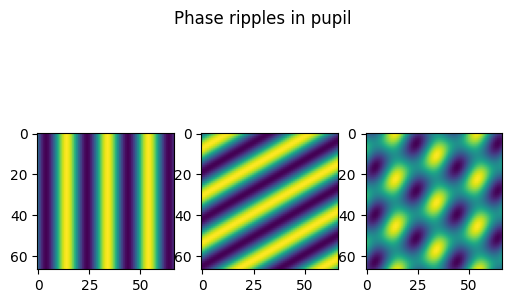

In [8]:
phases = createripples((nn,nn), offsets=(0,), angles=(0,60))
phases.append(phases[0] + phases[1]) # two ripples!
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'Phase ripples in pupil')
ax1.imshow(phases[0][slc,slc])
ax2.imshow(phases[1][slc,slc])
ax3.imshow(phases[2][slc,slc])

In [9]:
def calcpsf_fftstyle(pupil, phase):
  """ 
  calculate fftstyle no-loss-of-info PSF
  pupil and phase(radians)  arrays must be samme shape
  """
  # instantiate an mft object:
  ft = matrixDFT.MatrixFourierTransform()
    
  imagefield = ft.perform(pupil*np.exp(1j*phase), pupil.shape, pupil.shape)
  image_intensity = (imagefield*imagefield.conj()).real
  return image_intensity / image_intensity.max()

In [12]:
psfs = []
ripplepeak = 0.5 # radians
for ph in  phases:
  psfs.append(calcpsf_fftstyle(entrancepupil, ripplepeak*ph))

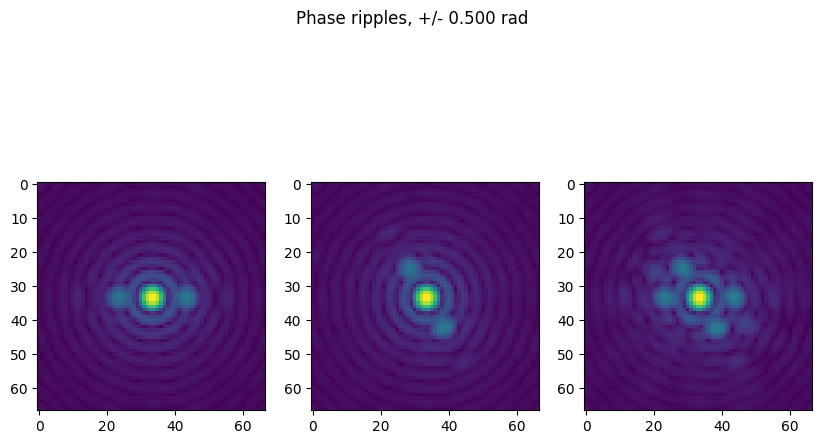

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))
fig.suptitle(f'Phase ripples, +/- {ripplepeak:.3f} rad')
ax1.imshow(np.power(psfs[0][slc,slc], imexpo))
ax2.imshow(np.power(psfs[1][slc,slc], imexpo))
ax3.imshow(np.power(psfs[2][slc,slc], imexpo))